<a href="https://colab.research.google.com/github/njafarov/Optimization_NLP/blob/main/Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

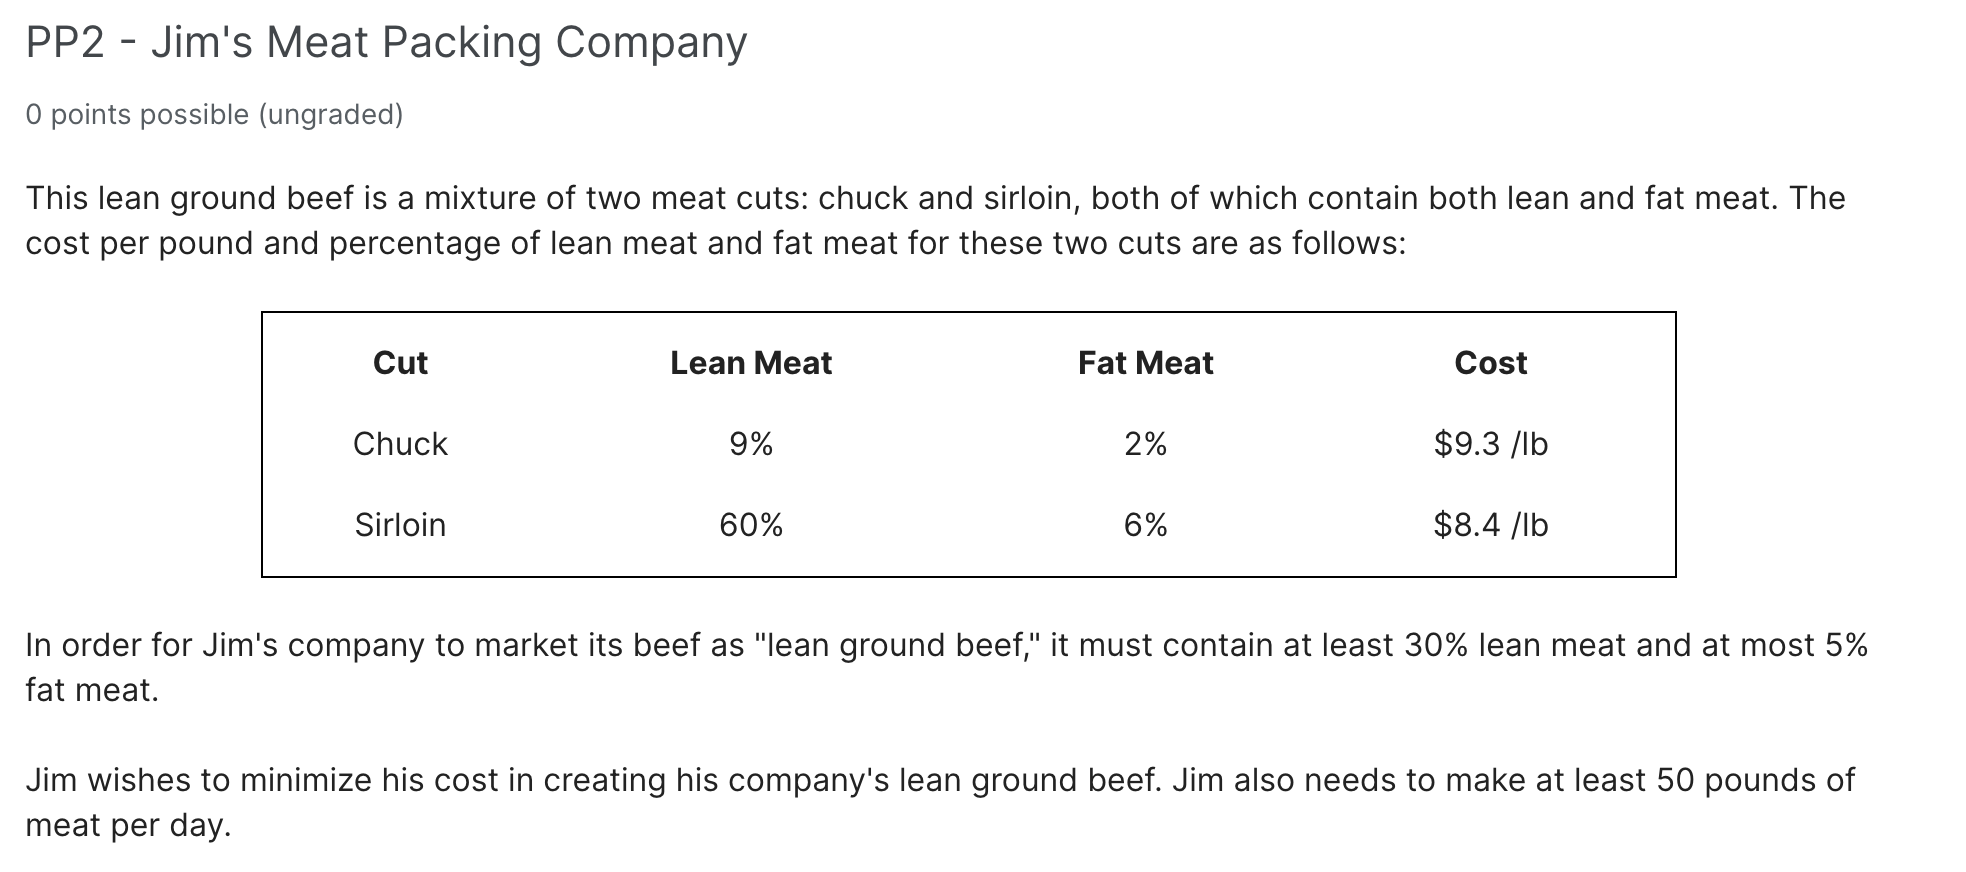

In [1]:
!pip install pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 26.9 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 


In [5]:
from ast import expr

# Define the model
model = pyo.ConcreteModel()

# Define sets
model.i = pyo.Set(initialize=['Chuck','Sirloin'])


#Parameters
model.LM = pyo.Param(model.i, initialize={'Chuck':0.09,'Sirloin':0.60})
LM = model.LM # Conversion between item and litre 

model.FM = pyo.Param(model.i, initialize={'Chuck':0.02,'Sirloin':0.06})
FM = model.FM # Sales price

model.Cost = pyo.Param(model.i, initialize={'Chuck':9.3,'Sirloin':8.4})
Cost = model.Cost




# Decision variable
model.x = pyo.Var(model.i, domain=pyo.NonNegativeReals)
x = model.x


#Objective function
def objective_function(model,i):
  return sum(x[i]*Cost[i] for i in model.i)
  
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.minimize)

#Constrains
def cons1(model,i):
  return sum(x[i]*LM[i]for i in model.i)/sum(x[i]for i in model.i)>=0.3
model.Cons1 = pyo.Constraint(model.i, rule=cons1)

def cons2(model,i):
  return sum(x[i]*FM[i]for i in model.i)/sum(x[i] for i in model.i)<=0.05
model.Cons2 = pyo.Constraint(model.i, rule=cons2)



def cons3(model,i):
  return sum(x[i] for i in model.i)>=50
model.Cons3 = pyo.Constraint(model.i, rule=cons3)



# Solution
Solver = SolverFactory('ipopt',executable = '/content/ipopt')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  print("The amount of product ",i,"is ", x[i]())


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 2
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.040053606033325195
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  431.24998444752424
The amount of product  Chuck is  12.499987380714604
The amount of product  Sirloin is  37.500012119866476
